In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [5]:
len(array_Xtest)

88632

In [6]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [7]:
len(array_Ytest)

88632

In [8]:
model = keras.models.load_model('modelos/modeloGeneral_v1.h5')

In [9]:
from pickle import load
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [10]:
len(array_Ytest)

88632

2770/2770 [==============================] - 33s 12ms/step


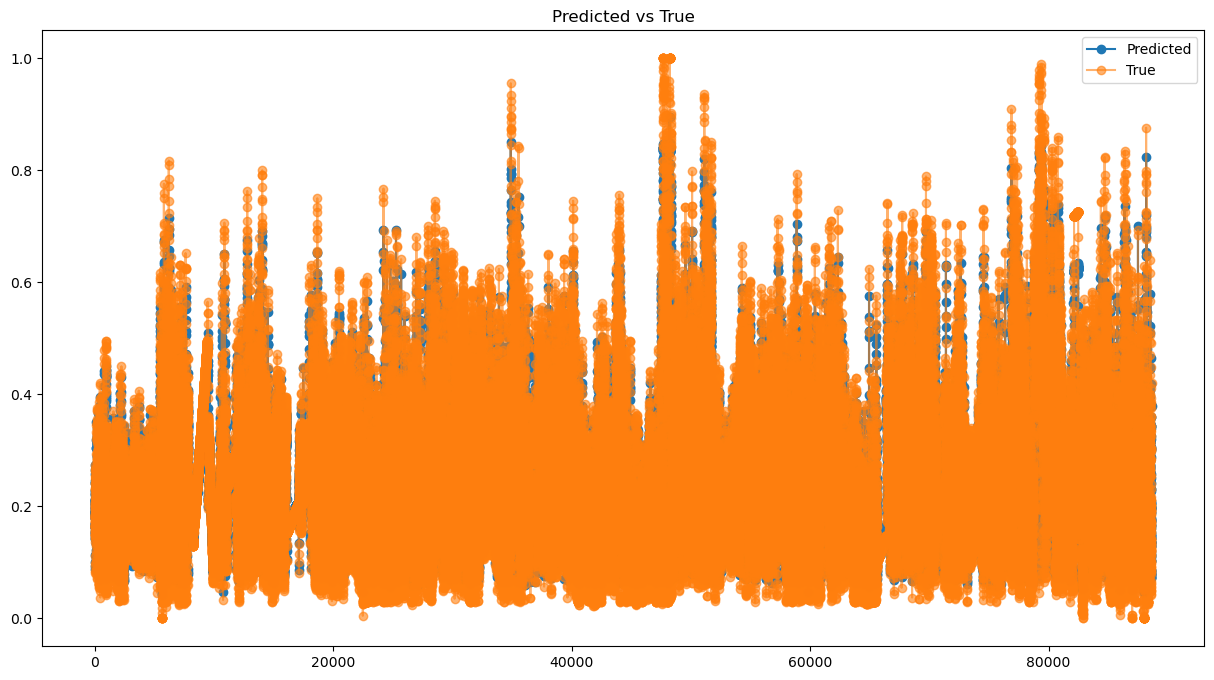

In [11]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [12]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.021018297789440584,
 'mse': 0.0295095808661422,
 'rmse': 0.0008708153628953858}

# Predicción a 30 min del conjunto de pruebas generales

In [13]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [14]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 91ms/step


,Glucose level Predict,Glucose level True
0,0.160979,0.165217
1,0.185907,0.178261


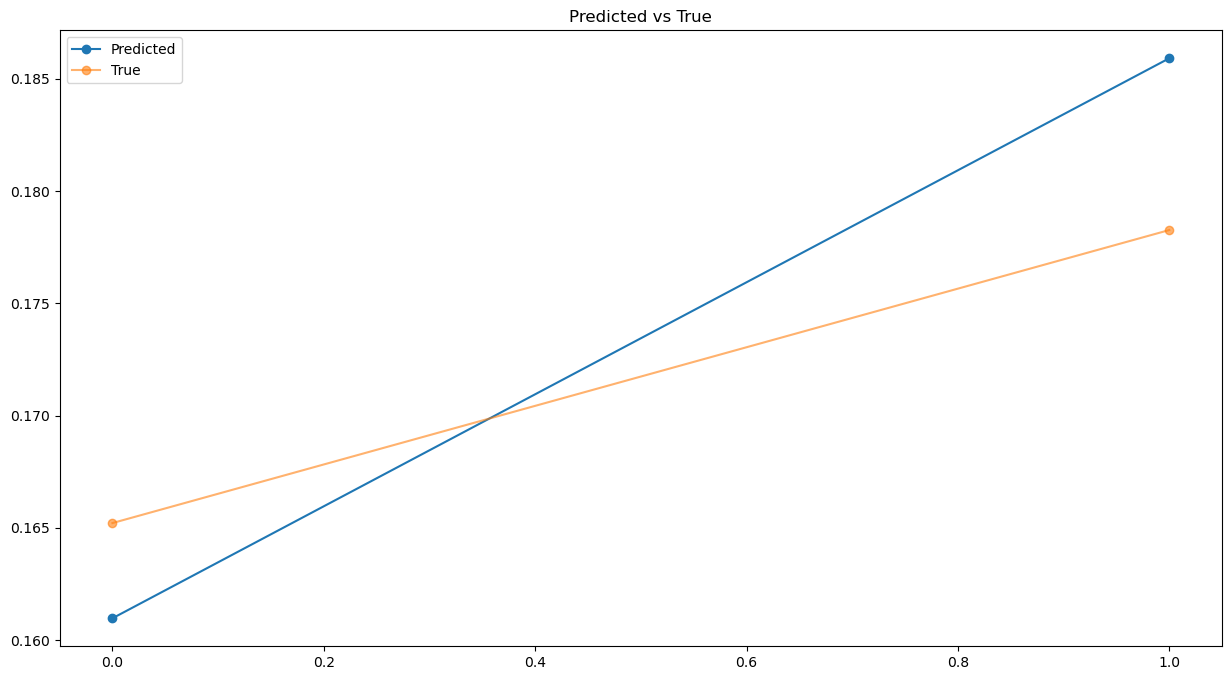

{'mae': 0.005942471260609816,
 'mse': 0.006181921341753016,
 'rmse': 3.82161514756214e-05}

In [15]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [16]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,114.050240,116.0
1,125.517326,122.0


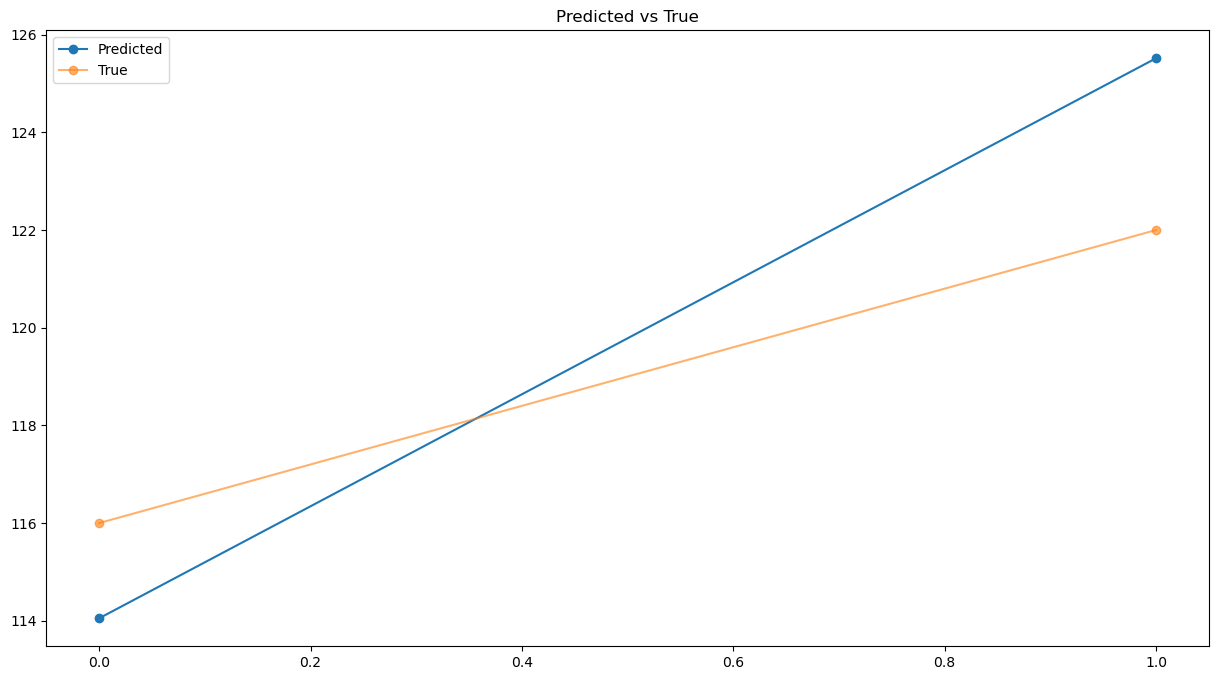

{'mae': 2.7335433959960795,
 'mse': 2.843690423479335,
 'rmse': 8.086575224588081}

In [17]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [18]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 74ms/step


,Glucose level Predict,Glucose level True
0,0.160979,0.165217
1,0.175874,0.178261


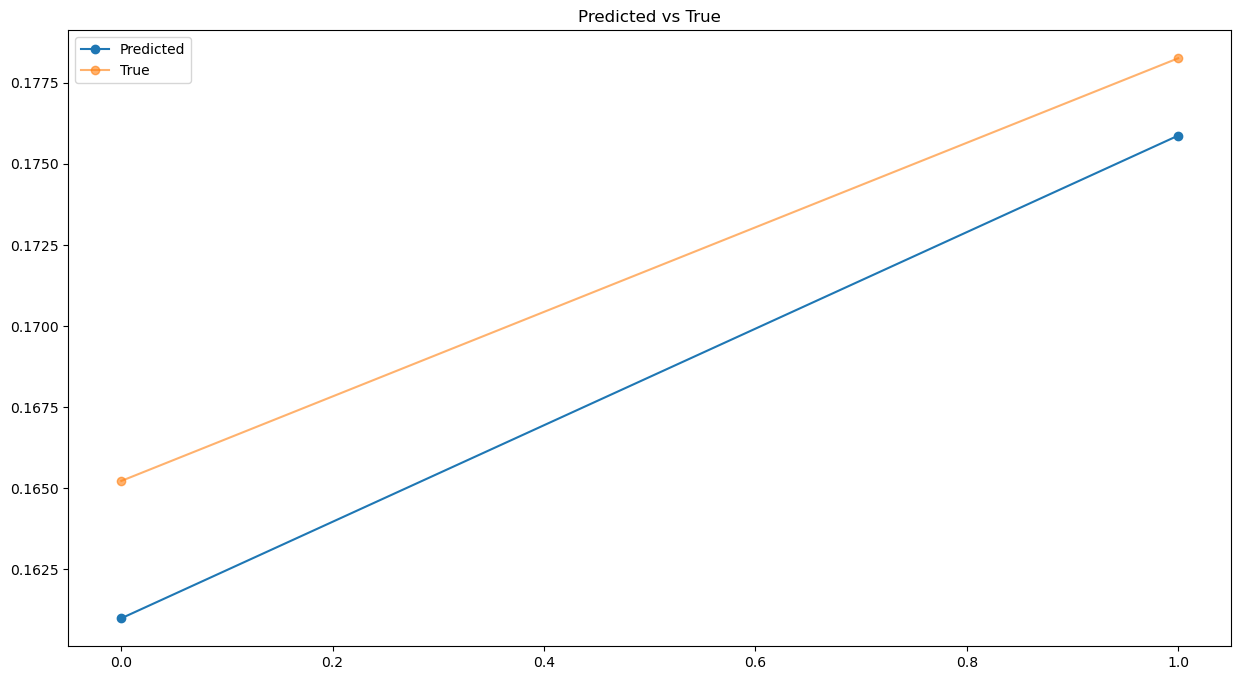

{'mae': 0.0033126316640688103,
 'mse': 0.003439609444655345,
 'rmse': 1.183091313176225e-05}

In [19]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [20]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,114.050247,116.0
1,120.902122,122.0


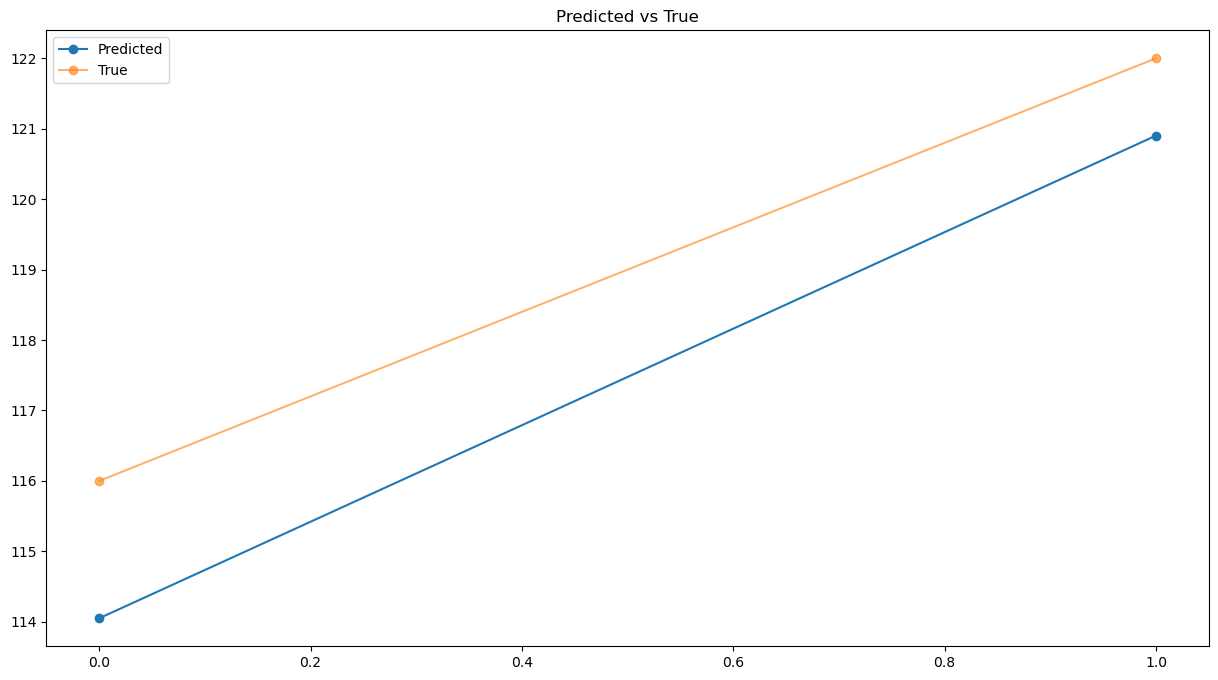

{'mae': 1.5238151550292969,
 'mse': 1.5822248609439276,
 'rmse': 2.5034355105890307}

In [21]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto eventos del paciente 1

In [22]:
with open('dataset/generado/paciente1/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [23]:
with open('dataset/generado/paciente1/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [24]:
len(X)

25

In [25]:
len(Y)

25

In [26]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

In [27]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 80ms/step


,Glucose level Predict,Glucose level True
0,0.136127,0.130435
1,0.315174,0.328261
2,0.319716,0.345652
3,0.105400,0.086957
4,0.263102,0.245652


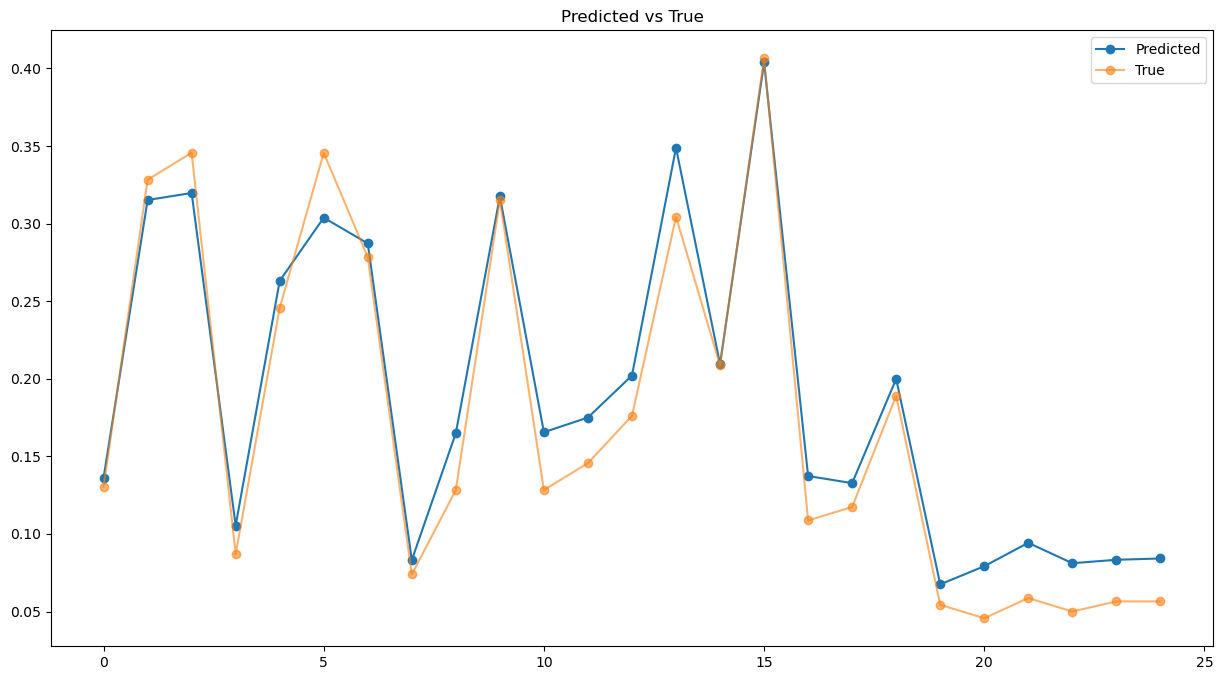

{'mae': 0.02171398727790168,
 'mse': 0.02521822586961814,
 'rmse': 0.0006359589160110775}

In [28]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

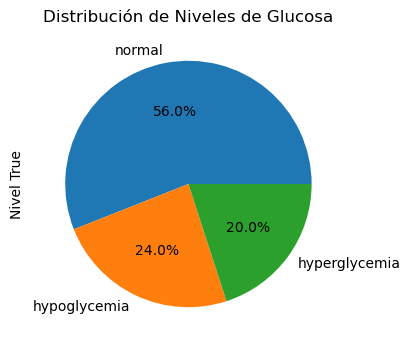

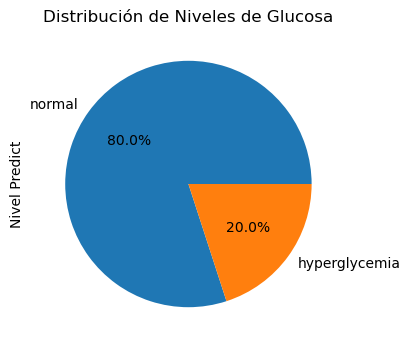

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,102.618309,normal,100.0,normal
1,184.979858,hyperglycemia,191.0,hyperglycemia
2,187.069321,hyperglycemia,199.0,hyperglycemia
3,88.483940,normal,80.0,normal
4,161.027145,normal,153.0,normal


In [29]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


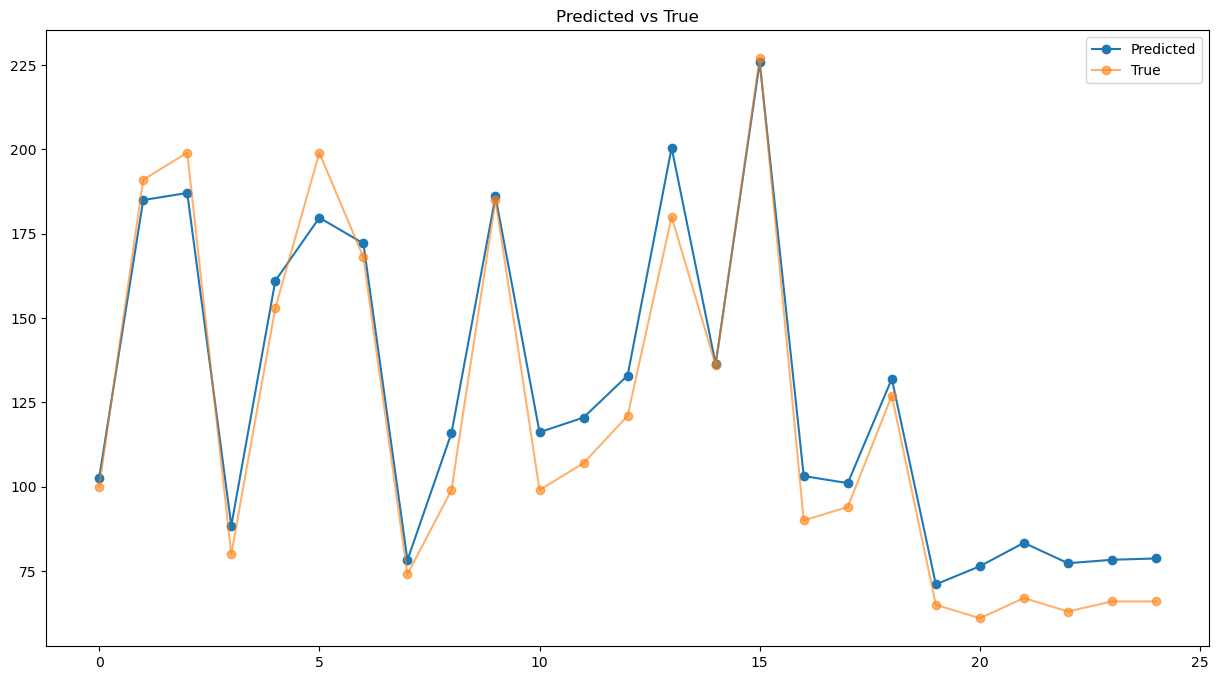

{'mae': 9.9884326171875, 'mse': 11.600382276555528, 'rmse': 134.56886896222363}

In [30]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 2

In [45]:
with open('dataset/generado/paciente2/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [46]:
with open('dataset/generado/paciente2/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [47]:
len(X)

25

In [48]:
len(Y)

25

In [35]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

In [ ]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

In [ ]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



In [ ]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 3

In [36]:
with open('dataset/generado/paciente3/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [37]:
with open('dataset/generado/paciente3/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [38]:
len(X)

24

In [39]:
len(Y)

24

In [40]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True'])

In [41]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 61ms/step


,Glucose level Predict,Glucose level True
0,0.064997,0.030435
1,0.171007,0.165217
2,0.202332,0.208696
3,0.064798,0.028261
4,0.232107,0.223913


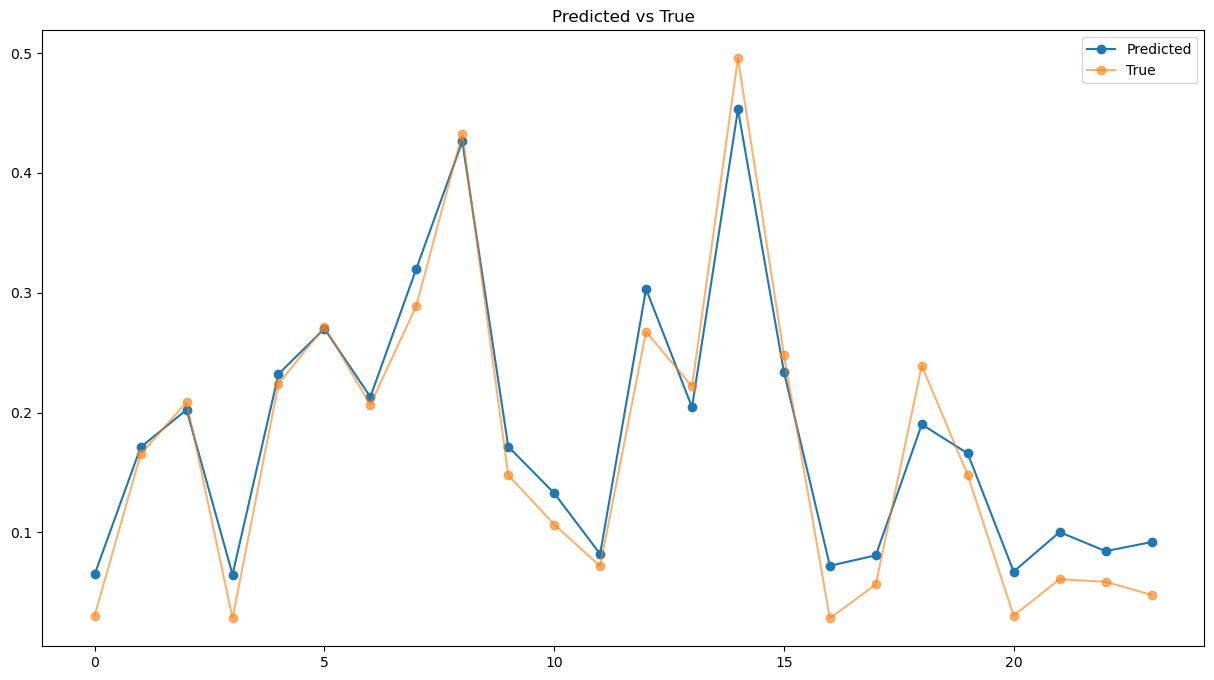

{'mae': 0.024484121302763617,
 'mse': 0.02842482498583498,
 'rmse': 0.0008079706754753487}

In [42]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

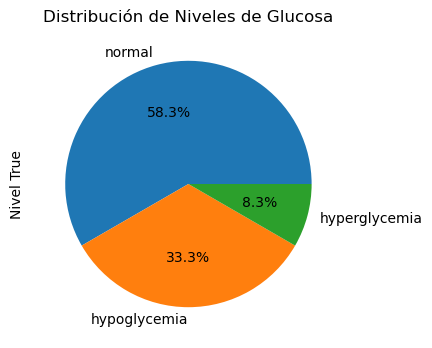

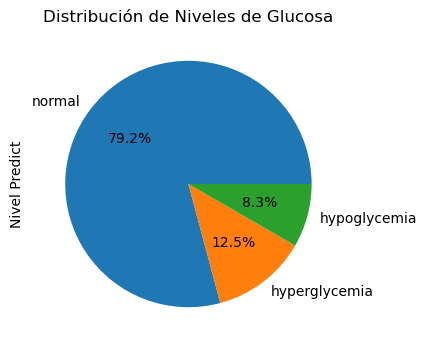

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,69.898636,hypoglycemia,54.0,hypoglycemia
1,118.663116,normal,116.0,normal
2,133.072754,normal,136.0,normal
3,69.807251,hypoglycemia,53.0,hypoglycemia
4,146.769180,normal,143.0,normal


In [43]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



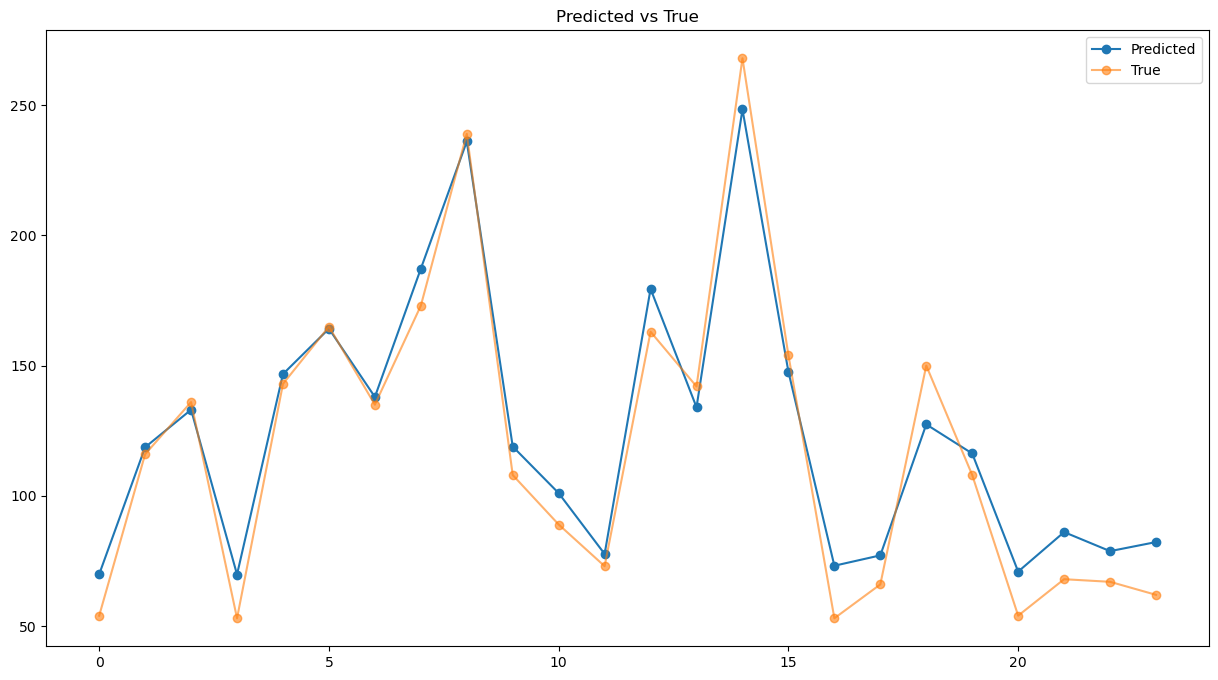

{'mae': 11.262695948282877,
 'mse': 13.075419466665807,
 'rmse': 170.96659422926314}

In [44]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)